# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Dataset
Load the agriculture.csv dataset into a pandas DataFrame.

In [9]:
file_path = '/Users/admin/Documents/Programming/ds-and-ml-python/handsOnML/dsci_sem_draft_01/agriculture.csv'
agriculture_df = pd.read_csv(file_path)
agriculture_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,2018,2018,3050,FAO TIER 1,kt,22645.0185,E,Estimated value,NaN
1,GT,Emissions totals,356,India,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,2018,2018,3050,FAO TIER 1,kt,22645.0185,E,Estimated value,NaN
2,GT,Emissions totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,2019,2019,3050,FAO TIER 1,kt,22760.1610,E,Estimated value,NaN
3,GT,Emissions totals,356,India,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,2019,2019,3050,FAO TIER 1,kt,22760.1610,E,Estimated value,NaN
4,GT,Emissions totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,2020,2020,3050,FAO TIER 1,kt,23823.4735,E,Estimated value,NaN


# Data Preprocessing
Clean and preprocess the data, including handling missing values and converting data types if necessary.

In [10]:
missing_values = agriculture_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop columns that are not necessary for analysis
columns_to_drop = ['Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code', 'Year Code', 'Source Code', 'Flag', 'Flag Description', 'Note']
agriculture_df.drop(columns=columns_to_drop, inplace=True)

# Convert data types if necessary
# For example, ensure 'Year' is of type int and 'Value' is of type float
agriculture_df['Year'] = agriculture_df['Year'].astype(int)
agriculture_df['Value'] = agriculture_df['Value'].astype(float)

# Display the first few rows of the cleaned DataFrame to verify preprocessing
agriculture_df.head()

Missing values in each column:
 Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code             0
Item                  0
Year Code             0
Year                  0
Source Code           0
Source                0
Unit                  0
Value                 0
Flag                  0
Flag Description      0
Note                460
dtype: int64


,Domain,Area,Element,Item,Year,Source,Unit,Value
0,Emissions totals,India,Emissions (CO2eq) from N2O (AR5),Crop Residues,2018,FAO TIER 1,kt,22645.0185
1,Emissions totals,India,Emissions (CO2eq) (AR5),Crop Residues,2018,FAO TIER 1,kt,22645.0185
2,Emissions totals,India,Emissions (CO2eq) from N2O (AR5),Crop Residues,2019,FAO TIER 1,kt,22760.1610
3,Emissions totals,India,Emissions (CO2eq) (AR5),Crop Residues,2019,FAO TIER 1,kt,22760.1610
4,Emissions totals,India,Emissions (CO2eq) from N2O (AR5),Crop Residues,2020,FAO TIER 1,kt,23823.4735


# Visualize Emissions by Year
Create a line plot to visualize the emissions over the years.

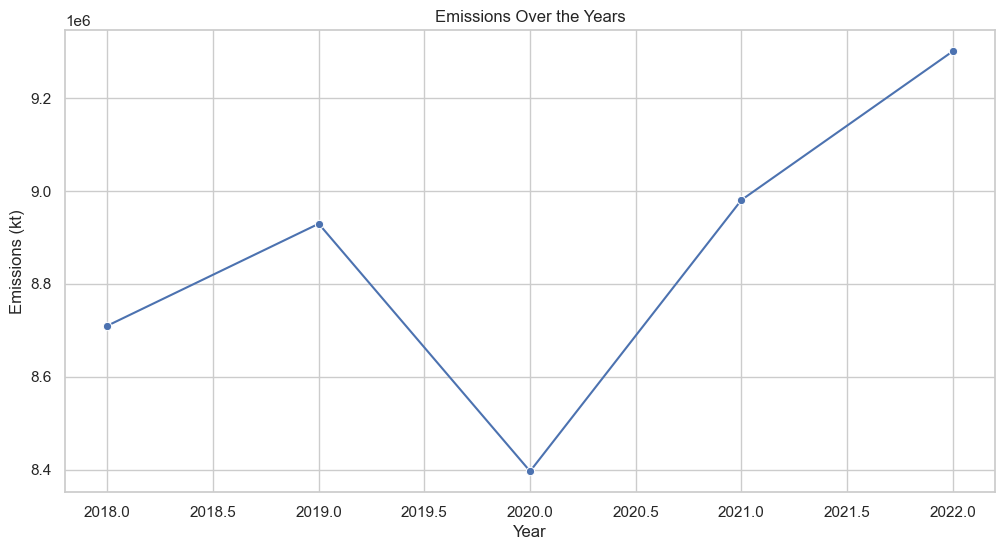

In [11]:
import seaborn as sns

# Filter the DataFrame to include only the necessary columns for visualization
emissions_df = agriculture_df[['Year', 'Value']]

# Group the data by 'Year' and sum the emissions values for each year
emissions_by_year = emissions_df.groupby('Year').sum().reset_index()

# Create a line plot to visualize the emissions over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=emissions_by_year, x='Year', y='Value', marker='o')
plt.title('Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.grid(True)
plt.show()

# Visualize Emissions by Item
Create a bar plot to visualize the emissions for different items.

/var/folders/58/fnr7st2n30939kb5g0w3wlc40000gn/T/ipykernel_19033/2320283466.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emissions_by_item, x='Value', y='Item', palette='viridis')


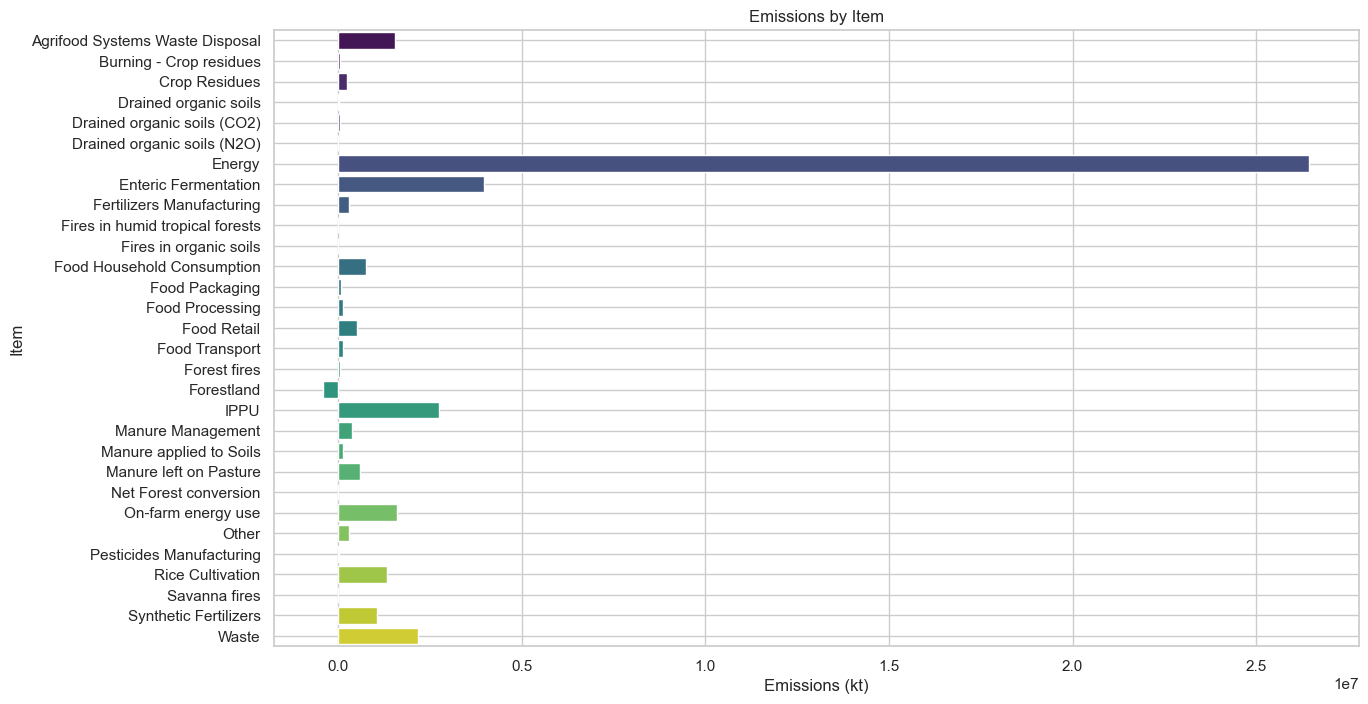

In [12]:
# Filter the DataFrame to include only the necessary columns for visualization
emissions_by_item_df = agriculture_df[['Item', 'Value']]

# Group the data by 'Item' and sum the emissions values for each item
emissions_by_item = emissions_by_item_df.groupby('Item').sum().reset_index()

# Create a bar plot to visualize the emissions for different items
plt.figure(figsize=(14, 8))
sns.barplot(data=emissions_by_item, x='Value', y='Item', palette='viridis')
plt.title('Emissions by Item')
plt.xlabel('Emissions (kt)')
plt.ylabel('Item')
plt.grid(True)
plt.show()

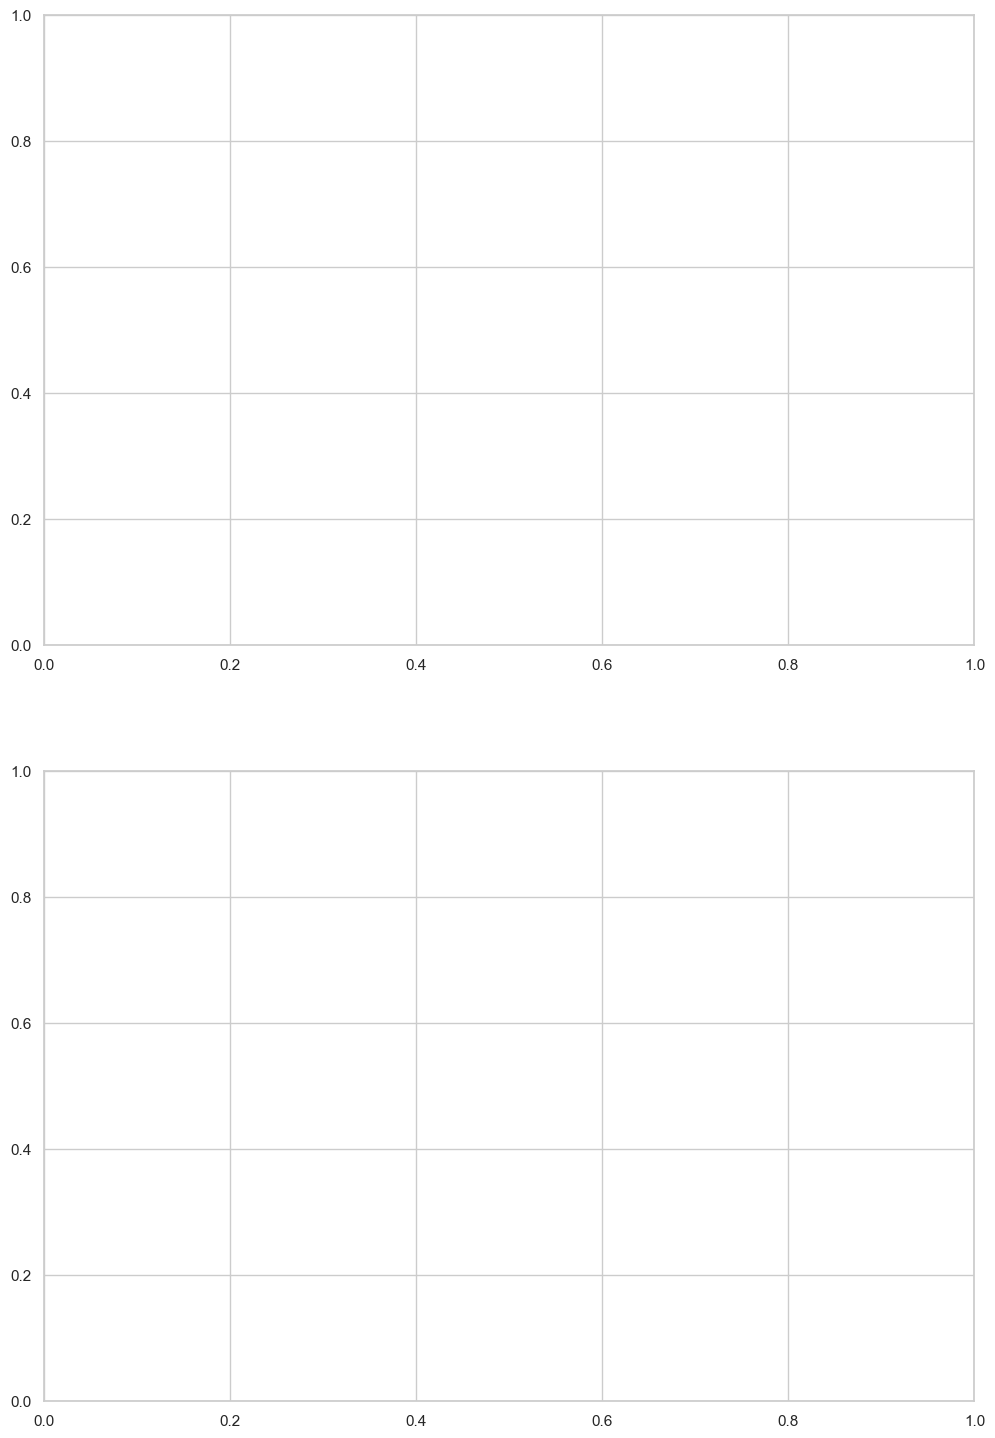

In [ ]:
# Plot 1: Total Emissions Over Years
# Set style for plots
sns.set_theme(style="whitegrid")

# General plot 1: Total emissions per year
emissions_per_year = agriculture_df.groupby("Year")["Value"].sum().reset_index()
# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(12, 18))
sns.barplot(x="Year", y="Value", data=emissions_per_year, ax=axs[0], palette="viridis")
axs[0].set_title("Total Emissions Over Years")
axs[0].set_ylabel("Emissions (kt)")
axs[0].set_xlabel("Year")
plt.tight_layout()
plt.show()


/var/folders/58/fnr7st2n30939kb5g0w3wlc40000gn/T/ipykernel_19033/2393274191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Value", data=emissions_per_year, ax=axs[0], palette="viridis")


<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot 3: Emissions by Element
# Set style for plots
sns.set_theme(style="whitegrid")




# General plot 3: Emissions by Element
emissions_by_element = agriculture_df.groupby("Element")["Value"].sum().sort_values(ascending=False).reset_index()
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 18))
sns.barplot(x="Value", y="Element", data=emissions_by_element, ax=axs[1], palette="magma")
axs[1].set_title("Total Emissions by Element")
axs[1].set_xlabel("Emissions (kt)")
axs[1].set_ylabel("Element")
plt.tight_layout()
plt.show()

/var/folders/58/fnr7st2n30939kb5g0w3wlc40000gn/T/ipykernel_19033/3816663183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value", y="Element", data=emissions_by_element, ax=axs[1], palette="magma")


<Figure size 640x480 with 0 Axes>